# Single Photon Scope Analysis

- Hamamatsu R375 PMT
- SR445A low noise preamp with 4 5x amplification gain stages, selectable 50Ohm/500Ohm input impedance
- DS4034B scope for capturing waveforms.
- SRS PS350 HV PSU for the R375 PMT

Gain of the PMT increases with voltage.

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from tqdm import tqdm

## PMT Hamamatsu R375@1100V, SR445A@50Ohm, stages 1&2

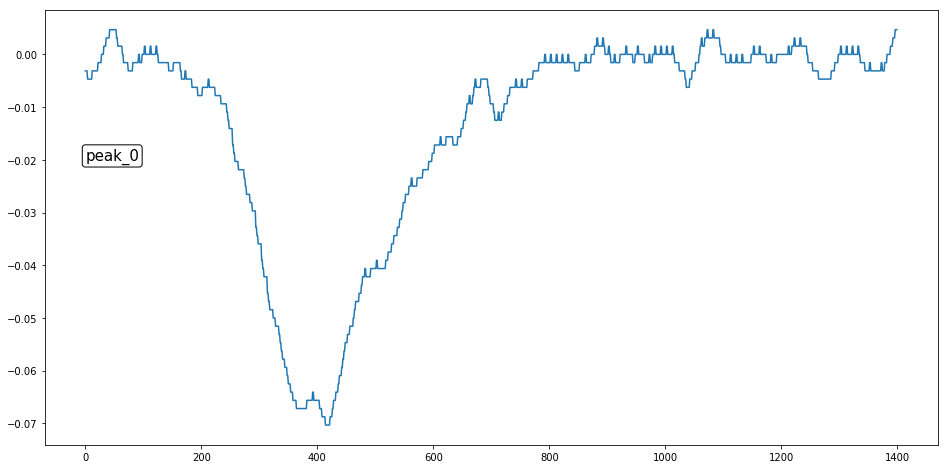

In [184]:
plotfun(0, data1100)

## PMT Hamamatsu R375@1100V, SR445A@50Ohm, stages 1,2&3

<BarContainer object of 50 artists>

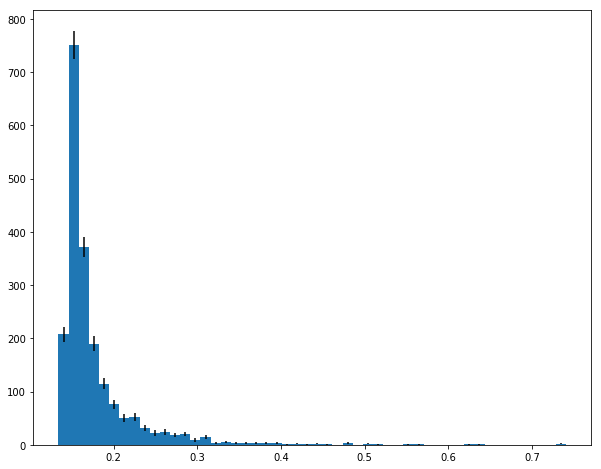

In [5]:
fname = 'single_photons_lightson_50Ohm_ampstage123_scope_1100V'
data1100_123 = []
with h5py.File(data_loc+fname+'.hdf5', 'r') as f:
    attrs = dict(f['peaks/'].attrs)
    gain = float(attrs['y_increment'])
    offset = int(attrs['y_origin'])
    for dset in f['peaks/']:
        values = (f['peaks/{0}'.format(dset)].value.astype(np.int16)-offset)*gain
        data1100_123.append((dset, values, values.min()))
        
tmp = [-1*d[2] for d in data1100_123]
fig, ax = plt.subplots(figsize = (10,8))
hist, edges = np.histogram(tmp, bins = 50)
center = np.diff(edges)[0]+edges[:-1]
ax.bar(center, hist, yerr = np.round(np.sqrt(hist)), width = np.diff(edges)[0])

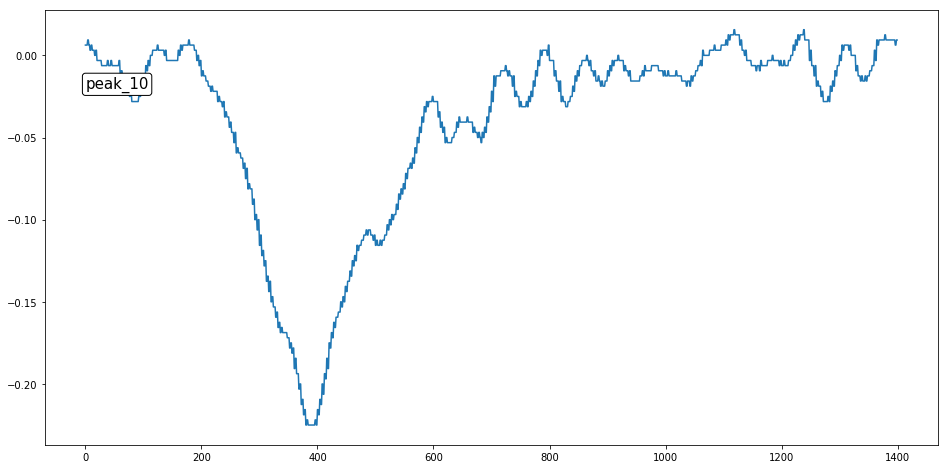

In [52]:
plotfun(2, data1100_123)

## PMT Hamamatsu R375@1400V, SR445A@50Ohm, stages 1&2

{'nr_averages': 1, 'x_increment': '5.000000e-11', 'x_origin': '-1.500000e-08', 'y_increment': '1.562500e-03', 'y_origin': 235}


<BarContainer object of 50 artists>

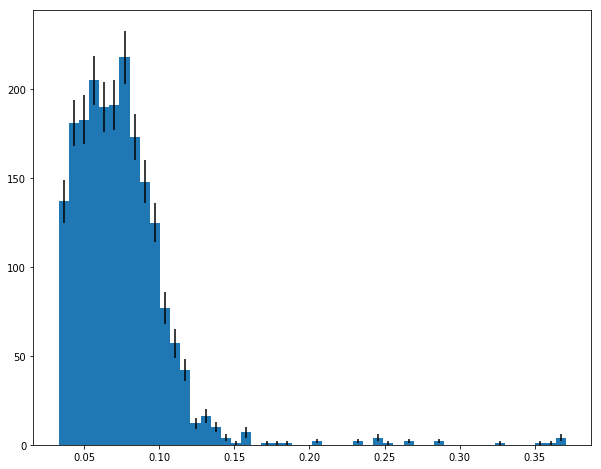

In [212]:
fname = 'single_photons_lightson_50Ohm_ampstage12_scope_1400V'
data1400 = []
with h5py.File(data_loc+fname+'.hdf5', 'r') as f:
    attrs = dict(f['peaks/'].attrs)
    print(attrs)
    gain = float(attrs['y_increment'])
    offset = int(attrs['y_origin'])
    for dset in f['peaks/']:
        values = (f['peaks/{0}'.format(dset)].value.astype(np.int16)-offset)*gain
        data1400.append((dset, values, values.min()))

tmp = [-1*d[2] for d in data1400]
fig, ax = plt.subplots(figsize = (10,8))
hist1400, edges1400 = np.histogram(tmp, bins = 50)
center1400 = np.diff(edges1400)[0]+edges1400[:-1]
ax.bar(center1400, hist1400, yerr = np.round(np.sqrt(hist1400)), width = np.diff(edges1400)[0])

In [221]:
def plotfun(dsetID,dset):
    fig, ax = plt.subplots(figsize = (16,8))
    y = dset[dsetID][1]
    x = np.linspace(0,len(y)-1,len(y))*5.000000e-11*1e9
    ax.plot(x,dset[dsetID][1])
    ax.text(0,-0.02,dset[dsetID][0],  {'fontsize': 15,'bbox': dict(boxstyle="round", fc="w", ec="k", pad=0.2)})
    ax.set_xlabel('time [ns]', fontsize = 15)
    ax.set_ylabel('[V]', fontsize = 15)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 15)

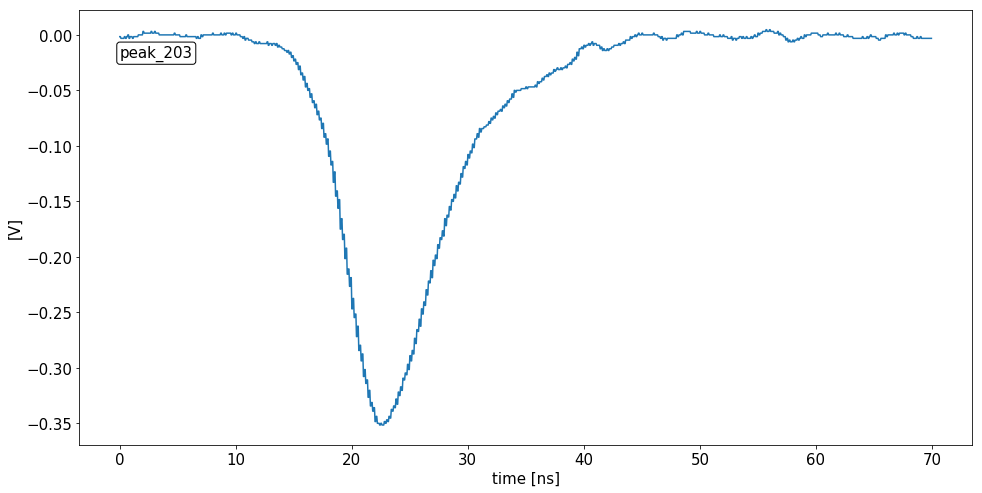

In [222]:
plotfun(1117, data1400)

## PMT Hamamatsu R375@1400V, SR445A@50Ohm, stages 1,2&3

<BarContainer object of 50 artists>

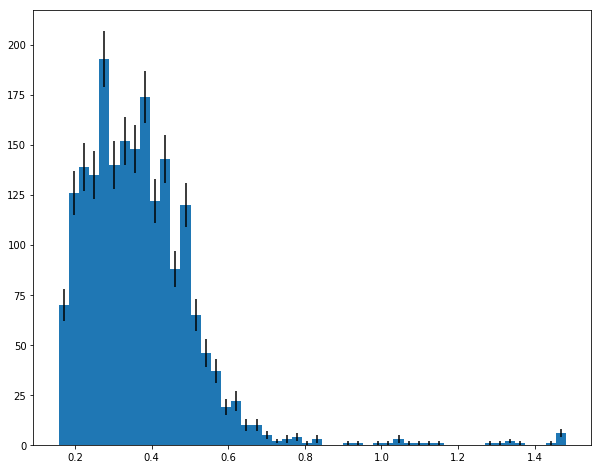

In [7]:
fname = 'single_photons_lightson_50Ohm_ampstage123_scope_1400V'
data1400_123 = []
with h5py.File(data_loc+fname+'.hdf5', 'r') as f:
    attrs = dict(f['peaks/'].attrs)
    gain = float(attrs['y_increment'])
    offset = int(attrs['y_origin'])
    for dset in f['peaks/']:
        values = (f['peaks/{0}'.format(dset)].value.astype(np.int16)-offset)*gain
        data1400_123.append((dset, values, values.min()))

tmp = [-1*d[2] for d in data1400_123]
fig, ax = plt.subplots(figsize = (10,8))
hist1400, edges1400 = np.histogram(tmp, bins = 50)
center1400 = np.diff(edges1400)[0]+edges1400[:-1]
ax.bar(center1400, hist1400, yerr = np.round(np.sqrt(hist1400)), width = np.diff(edges1400)[0])

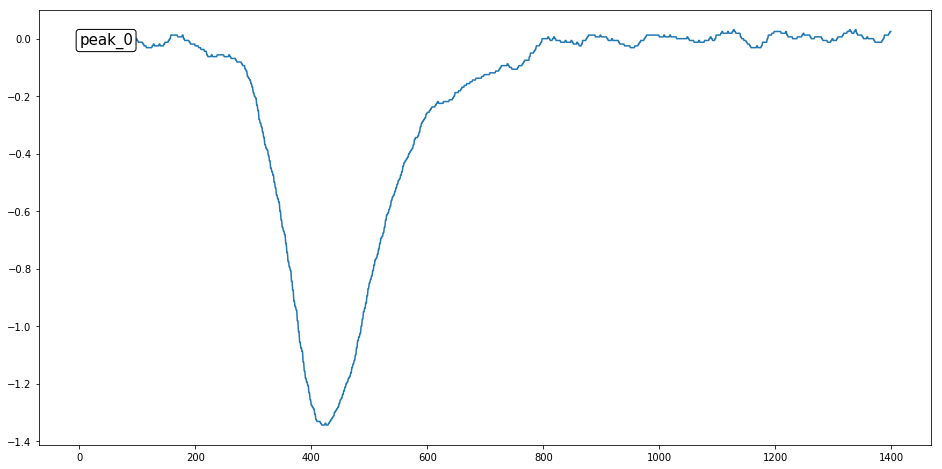

In [56]:
plotfun(0, data1400_123)

## PMT Hamamatsu R375@1400V, SR445A@50Ohm, stages 1,2&3, 5Mhz low pass between stages 2&3

<BarContainer object of 50 artists>

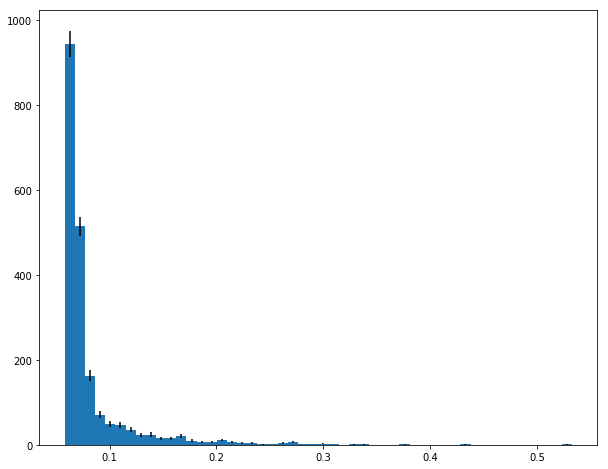

In [81]:
fname = 'single_photons_lightson_50Ohm_ampstage123_scope_1400V_5MHzLowPass'
data1400_123_5MhzLP = []
with h5py.File(data_loc+fname+'.hdf5', 'r') as f:
    attrs = dict(f['peaks/'].attrs)
    gain = float(attrs['y_increment'])
    offset = int(attrs['y_origin'])
    for dset in f['peaks/']:
        values = (f['peaks/{0}'.format(dset)].value.astype(np.int16)-offset)*gain
        data1400_123_5MhzLP.append((dset, values, values.min()))

tmp = [-1*d[2] for d in data1400_123_5MhzLP]
fig, ax = plt.subplots(figsize = (10,8))
hist, edges = np.histogram(tmp, bins = 50)
center = np.diff(edges)[0]+edges[:-1]
ax.bar(center, hist, yerr = np.round(np.sqrt(hist)), width = np.diff(edges)[0])

In [88]:
float(attrs['x_increment'])*150

1.49999985e-07

In [ ]:
attrs

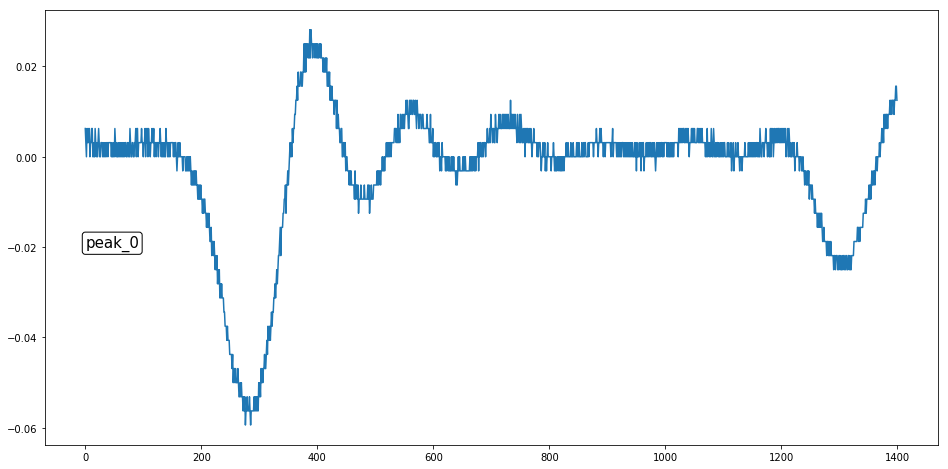

In [57]:
plotfun(0, data1400_123_5MhzLP)

In [155]:
from scipy.interpolate import interp1d
from scipy.optimize import brentq

show_errors = True

def get_peakwidths(fname):
    with h5py.File(fname+'.hdf5', 'r') as f:
        attrs = dict(f['peaks/'].attrs)
        gain = float(attrs['y_increment'])
        offset = int(attrs['y_origin'])
        dt = float(attrs['x_increment'])
        peakWidths = []
        for dset in f['peaks/']:
            y = -(f['peaks/{0}'.format(dset)].value.astype(np.int16)-offset)*gain
            x = np.linspace(-len(y)//2,len(y)//2-1,len(y))*dt
            
            try:
                intp = interp1d(x,y)
            except Exception as e:
                if show_errors:
                    print(dset)
                    fig, ax = plt.subplots(figsize = (12,8))
                    ax.plot(x,y)
                    raise e
                else:
                    continue
            
            half_max = y.max()/2
            intersect = lambda x: intp(x)-half_max
            peakLoc = np.argmax(y)
            try:
                left = brentq(intersect, x.min(), x[peakLoc])
            except Exception as e:
                if show_errors:
                    print(dset)
                    fig, ax = plt.subplots(figsize = (12,8))
                    ax.plot(x, intp(x))
                    ax.plot(x, half_max*np.ones(len(x)))
                    raise e
                else: 
                    continue    
            try:
                try:
                    rm = x[peakLoc+100]
                except Exception as e:
                    rm = x.max()
                right = brentq(intersect, x[peakLoc], rm)
            except Exception as e:
                if show_errors:
                    print(dset)
                    fig, ax = plt.subplots(figsize = (12,8))
                    ax.plot(x, intp(x))
                    ax.plot(x, half_max*np.ones(len(x)))
                    raise e
                else:
                    continue
            peakWidths.append(right-left)
        return np.array(peakWidths)

In [158]:
peak_widths = get_peakwidths(data_loc+fname)

gaussian mean : 9.27e-08 us
standard mean : 9.21e-08 us


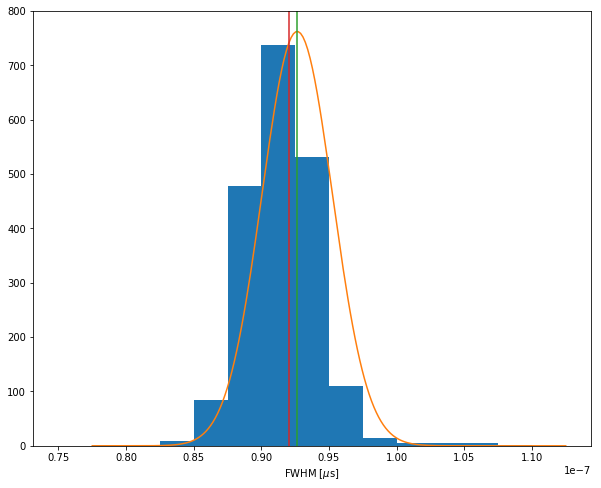

In [170]:
bins = np.arange(75e-9,115e-9,2.5e-9)

fig, ax = plt.subplots(figsize = (10,8))
hist = ax.hist(peak_widths, bins = bins);
ax.set_xlabel('FWHM [$\mu$s]')

xx = np.diff(hist[1])+hist[1][:-1]
yy = hist[0]
popt, pcov = curve_fit(gaussian, xx, yy, p0 = (yy.max(), peak_widths.mean(), peak_widths.std()))
xxx = np.linspace(xx.min(), xx.max(), 201)
ax.plot(xxx, gaussian(xxx, *popt))

ax.axvline(popt[1], color = 'C2')
ax.axvline(peak_widths[peak_widths < 0.175].mean(), color = 'C3')

print('gaussian mean : {0:.2e} us'.format(popt[1]))
print('standard mean : {0:.2e} us'.format(peak_widths[peak_widths < 0.175].mean()))

## Filtering Out Oscillations

### Only necessary for measurements without low pass filter

Not sure where the oscillations originate from yet.  
Fitting a sinusoidal to each triggered waveform and rejecting waveforms with chi2 which are below a certain limit.  
The limit is determined experimentally.

### Filtering Hamamatsu R375@1400V, SR445A@50Ohm, stages 1&2

In [9]:
from ipywidgets import interact
import ipywidgets as widgets

def plotfun(dsetID,dset):
    fig, ax = plt.subplots(figsize = (16,8))
    ax.plot(dset[dsetID][1])
    ax.text(0,-0.02,dset[dsetID][0],  {'fontsize': 15,'bbox': dict(boxstyle="round", fc="w", ec="k", pad=0.2)})
# interact(plotfun, dsetID=widgets.IntSlider(min=0, max = 1999, step = 1, value = 0))

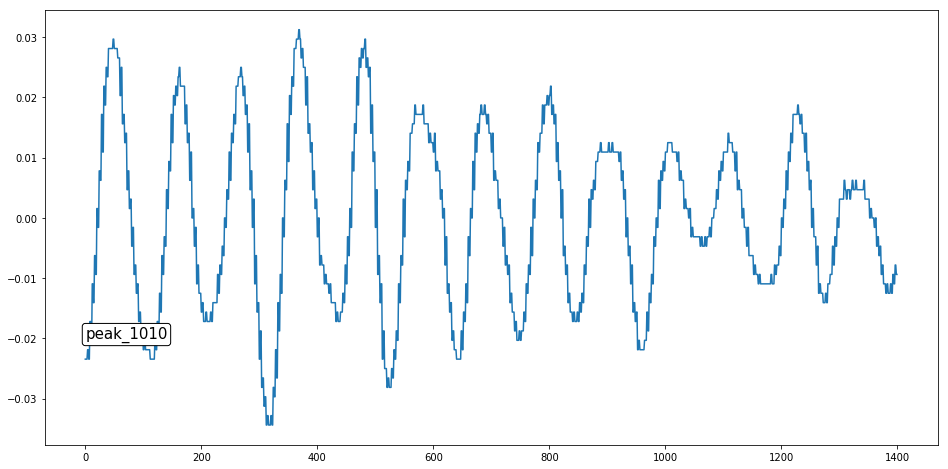

In [10]:
plotfun(15, data1400)

0.07354560079300455


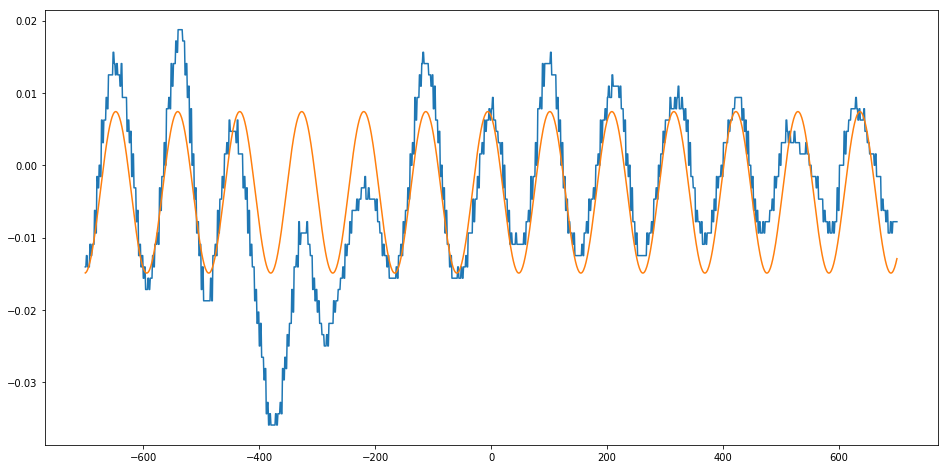

In [11]:
from scipy.optimize import curve_fit

dsetID = 1800

y = data1400[dsetID][1]
x = np.linspace(-len(y)//2,len(y)//2,len(y))

def fitfun(x,ampA, ampB,omega,offset):
    return ampA*np.sin(omega*x)+ampB*np.cos(omega*x)+offset

p0 = (y.ptp(), y.ptp(), 0.059, 0)
popt, pcov = curve_fit(fitfun, x,y, p0)
fig, ax = plt.subplots(figsize = (16,8))
ax.plot(x,y)
ax.plot(x, fitfun(x,*popt))

print(np.sum((y-fitfun(x, *popt))**2))

In [12]:
check_valid_1400 = []
for d in tqdm(data1400):
    y = d[1]
    x = np.linspace(-len(y)//2,len(y)//2,len(y))
    p0 = (y.ptp(), y.ptp(), 0.059, 0)
    popt, pcov = curve_fit(fitfun, x,y, p0)
    check_valid_1400.append((d[0],np.sum((y-fitfun(x, *popt))**2)))

100%|██████████| 2000/2000 [00:09<00:00, 212.72it/s]


In [13]:
mask_ids_1400 = [nr for nr,(_,val) in enumerate(check_valid_1400) if val < 0.08]
valid_ids_1400 = list(set(np.linspace(0,len(data1400)-1,len(data1400), dtype = np.int))-set(mask_ids_1400))
peaks1400 = [data1400[valid][2] for valid in valid_ids_1400]

<BarContainer object of 38 artists>

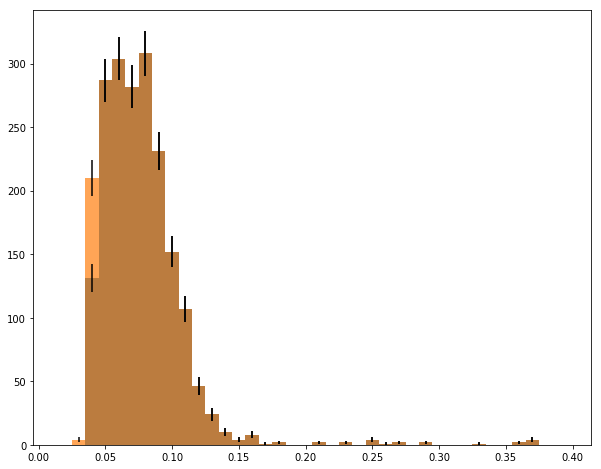

In [14]:
bins = np.arange(0.01, 0.4, 10e-3)

tmp = [-1*p for p in peaks1400]
fig, ax = plt.subplots(figsize = (10,8))
hist1400, edges1400 = np.histogram(tmp, bins = bins)
center1400 = np.diff(edges1400)[0]+edges1400[:-1]
ax.bar(center1400, hist1400, yerr = np.round(np.sqrt(hist1400)), width = np.diff(edges1400)[0])

tmp = [-1*d[2] for d in data1400]
hist1400, edges1400 = np.histogram(tmp, bins = bins)
center1400 = np.diff(edges1400)[0]+edges1400[:-1]
ax.bar(center1400, hist1400, yerr = np.round(np.sqrt(hist1400)), width = np.diff(edges1400)[0], alpha = 0.7)

### Filtering Hamamatsu R375@1100V, SR445A@50Ohm, stages 1&2

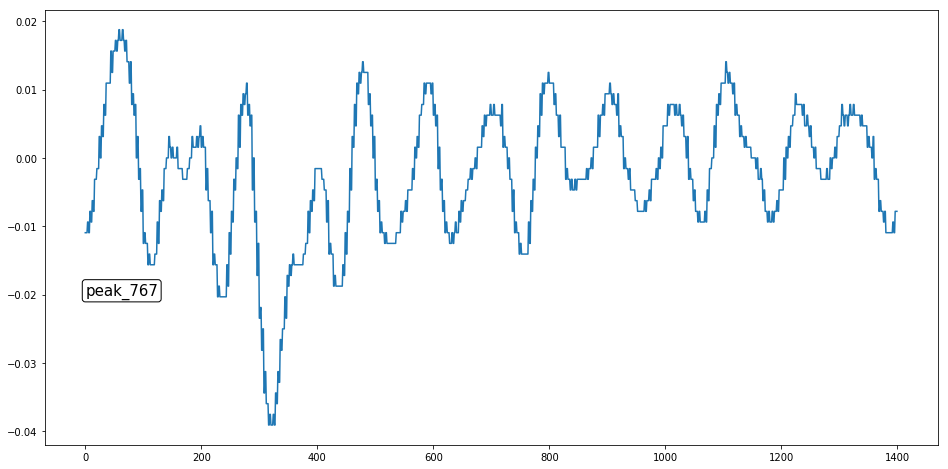

In [15]:
plotfun(1742, data1100)

In [16]:
check_valid_1100 = []
for d in tqdm(data1100):
    y = d[1]
    x = np.linspace(-len(y)//2,len(y)//2,len(y))
    p0 = (y.ptp(), y.ptp(), 0.059, 0)
    popt, pcov = curve_fit(fitfun, x,y, p0)
    check_valid_1100.append((d[0],np.sum((y-fitfun(x, *popt))**2)))

100%|██████████| 2000/2000 [00:10<00:00, 197.93it/s]


In [17]:
mask_ids_1100 = [nr for nr, (_,val) in enumerate(check_valid_1100) if val < 0.08] 
valid_ids_1100 = list(set(np.linspace(0,len(data1100)-1,len(data1100), dtype = np.int))-set(mask_ids_1100))
peaks1100 = [data1100[valid][2] for valid in valid_ids_1100]

<BarContainer object of 44 artists>

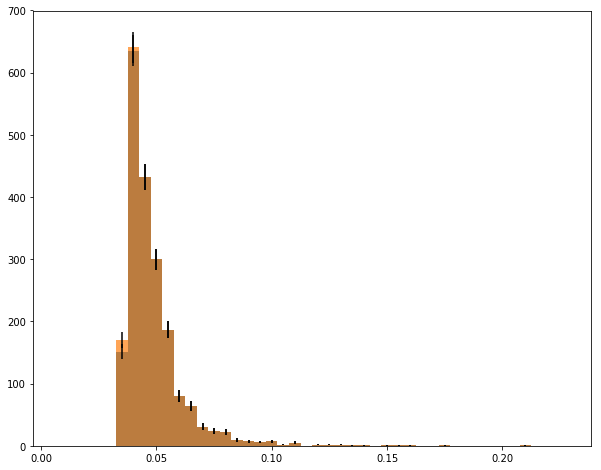

In [18]:
bins = np.arange(0.005, 0.23, 5e-3)

tmp = [-1*p for p in peaks1100]
fig, ax = plt.subplots(figsize = (10,8))
hist1100, edges1100 = np.histogram(tmp, bins = bins)
center1100 = np.diff(edges1100)[0]+edges1100[:-1]
ax.bar(center1100, hist1100, yerr = np.round(np.sqrt(hist1100)), width = np.diff(edges1100)[0])

tmp = [-1*d[2] for d in data1100]
hist1100, edges1100 = np.histogram(tmp, bins = bins)
center1100 = np.diff(edges1100)[0]+edges1100[:-1]
ax.bar(center1100, hist1100, yerr = np.round(np.sqrt(hist1100)), width = np.diff(edges1100)[0], alpha = 0.7)

### Filtering Hamamatsu R375@1100V, SR445A@50Ohm, stages 1,2&3

In [19]:
check_valid_1100_123 = []
for d in tqdm(data1100_123):
    y = d[1]
    x = np.linspace(-len(y)//2,len(y)//2,len(y))
    p0 = (y.ptp(), y.ptp(), 0.059, 0)
    popt, pcov = curve_fit(fitfun, x,y, p0)
    check_valid_1100_123.append((d[0],np.sum((y-fitfun(x, *popt))**2)))

100%|██████████| 2000/2000 [00:10<00:00, 184.72it/s]


In [20]:
data = data1100_123
check_valid = check_valid_1100_123
mask_ids = [nr for nr, (_,val) in enumerate(check_valid) if val < 1.1] 
valid_ids = list(set(np.linspace(0,len(data)-1,len(data), dtype = np.int))-set(mask_ids))
peaks1100_123 = [data[valid][2] for valid in valid_ids]

<BarContainer object of 49 artists>

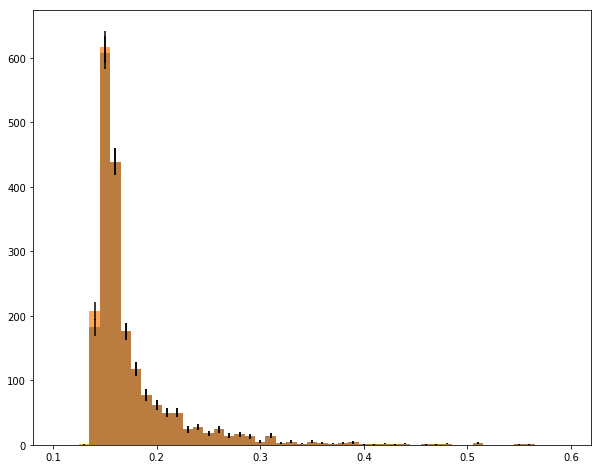

In [21]:
bins = np.arange(0.1, 0.6, 1e-2)

tmp = [-1*p for p in peaks1100_123]
fig, ax = plt.subplots(figsize = (10,8))
hist, edges = np.histogram(tmp, bins = bins)
center = np.diff(edges)[0]+edges[:-1]
ax.bar(center, hist, yerr = np.round(np.sqrt(hist)), width = np.diff(edges)[0])

tmp = [-1*d[2] for d in data1100_123]
hist, edges = np.histogram(tmp, bins = bins)
center = np.diff(edges)[0]+edges[:-1]
ax.bar(center, hist, yerr = np.round(np.sqrt(hist)), width = np.diff(edges)[0], alpha = 0.7)

### Filtering Hamamatsu R375@1400V, SR445A@50Ohm, stages 1,2&3

In [22]:
check_valid_1400_123 = []
for d in tqdm(data1400_123):
    y = d[1]
    x = np.linspace(-len(y)//2,len(y)//2,len(y))
    p0 = (y.ptp(), y.ptp(), 0.059, 0)
    popt, pcov = curve_fit(fitfun, x,y, p0)
    check_valid_1400_123.append((d[0],np.sum((y-fitfun(x, *popt))**2)))

100%|██████████| 2000/2000 [00:09<00:00, 212.95it/s]


In [23]:
data = data1400_123
check_valid = check_valid_1400_123
mask_ids = [nr for nr, (_,val) in enumerate(check_valid) if val < 1.9] 
valid_ids = list(set(np.linspace(0,len(data)-1,len(data), dtype = np.int))-set(mask_ids))
peaks1400_123 = [data[valid][2] for valid in valid_ids]

<BarContainer object of 27 artists>

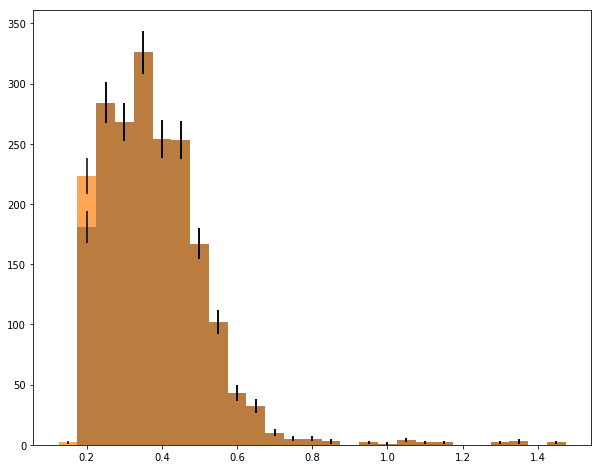

In [24]:
bins = np.arange(0.1, 1.5, 5e-2)

tmp = [-1*p for p in peaks1400_123]
fig, ax = plt.subplots(figsize = (10,8))
hist, edges = np.histogram(tmp, bins = bins)
center = np.diff(edges)[0]+edges[:-1]
ax.bar(center, hist, yerr = np.round(np.sqrt(hist)), width = np.diff(edges)[0])

tmp = [-1*d[2] for d in data1400_123]
hist, edges = np.histogram(tmp, bins = bins)
center = np.diff(edges)[0]+edges[:-1]
ax.bar(center, hist, yerr = np.round(np.sqrt(hist)), width = np.diff(edges)[0], alpha = 0.7)

## Find Peak Position

In [25]:
def gaussian(x, amp, mu, sig):
    return amp*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

### Peak Hamamatsu R375@1100V, SR445A@50Ohm, stages 1&2

mean : 4.56e-02 V
gaussian mean: 4.32e-02 V


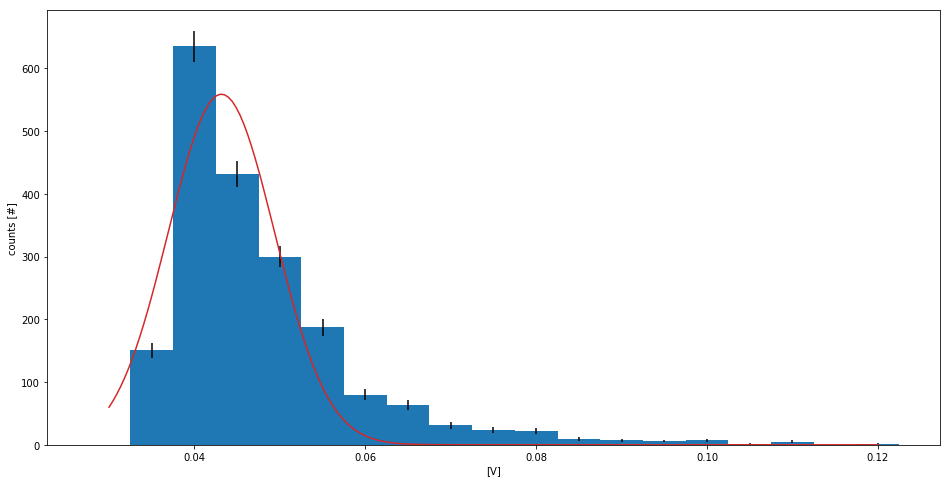

In [70]:
bins = np.arange(0.025, 0.125, 5e-3)

tmp = [-1*p for p in peaks1100]
hist, edges = np.histogram(tmp, bins = bins)
center = np.diff(edges)[0]+edges[:-1]
popt, pcov = curve_fit(gaussian, center, hist)

x = np.linspace(min(center),max(center),201)

fig, ax = plt.subplots(figsize = (16,8))
ax.bar(center, hist, yerr = np.round(np.sqrt(hist)), width = np.diff(edges)[0])
ax.plot(x, gaussian(x, *popt), 'C3')
ax.set_ylabel('counts [#]')
ax.set_xlabel('[V]')

print('mean : {0:.2e} V'.format(np.mean(tmp)))
print('gaussian mean: {0:.2e} V'.format(popt[1]))

In [71]:
import pint

ureg = pint.UnitRegistry()

peak = popt[1] * ureg.volt
elementary_charge = 1.6021766*1e-19 * ureg.coulomb
pmt_pulse = 9e-9 * ureg.second
load = 50 * ureg.ohm
amplifier_gain = 25


pmt_gain = (peak / ((elementary_charge/pmt_pulse)*load*amplifier_gain)).to_root_units()
print('PMT gain : {0:.2e}'.format(pmt_gain))

PMT gain : 1.94e+06 dimensionless


### Peak Hamamatsu R375@1400V, SR445A@50Ohm, stages 1&2

mean : 7.23e-02 V
gaussian mean: 7.12e-02 V


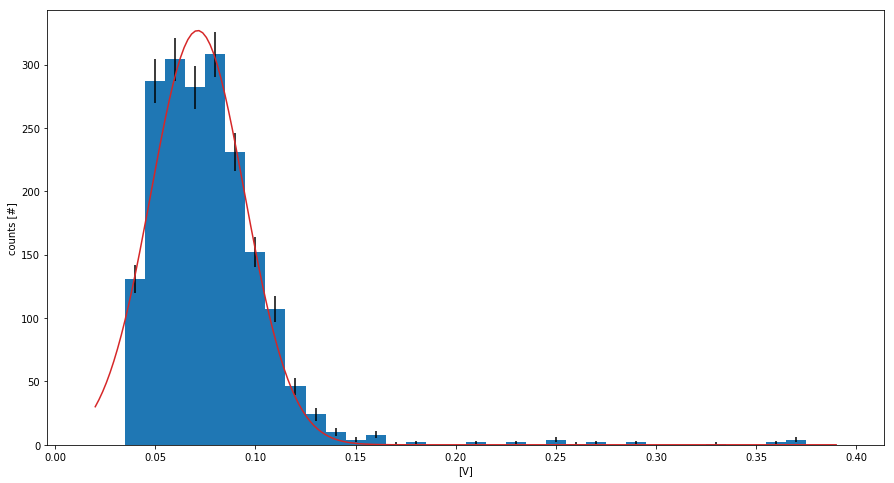

In [73]:
bins = np.arange(0.01, 0.4, 1e-2)

tmp = [-1*p for p in peaks1400]
hist, edges = np.histogram(tmp, bins = bins)
center = np.diff(edges)[0]+edges[:-1]
popt, pcov = curve_fit(gaussian, center, hist)

x = np.linspace(min(center),max(center),201)

fig, ax = plt.subplots(figsize = (15,8))
ax.bar(center, hist, yerr = np.round(np.sqrt(hist)), width = np.diff(edges)[0])
ax.plot(x, gaussian(x, *popt), 'C3')
ax.set_ylabel('counts [#]')
ax.set_xlabel('[V]')

print('mean : {0:.2e} V'.format(np.mean(tmp)))
print('gaussian mean: {0:.2e} V'.format(popt[1]))

In [74]:
import pint

ureg = pint.UnitRegistry()

peak = popt[1] * ureg.volt
elementary_charge = 1.6021766*1e-19 * ureg.coulomb
pmt_pulse = 9e-9 * ureg.second
load = 50 * ureg.ohm
amplifier_gain = 25


pmt_gain = (peak / ((elementary_charge/pmt_pulse)*load*amplifier_gain)).to_root_units()
print('PMT gain : {0:.2e}'.format(pmt_gain))

PMT gain : 3.20e+06 dimensionless


### Peak Hamamatsu R375@1100V, SR445A@50Ohm, stages 1,2&3

mean : 1.71e-01 V
gaussian mean: 1.54e-01 V


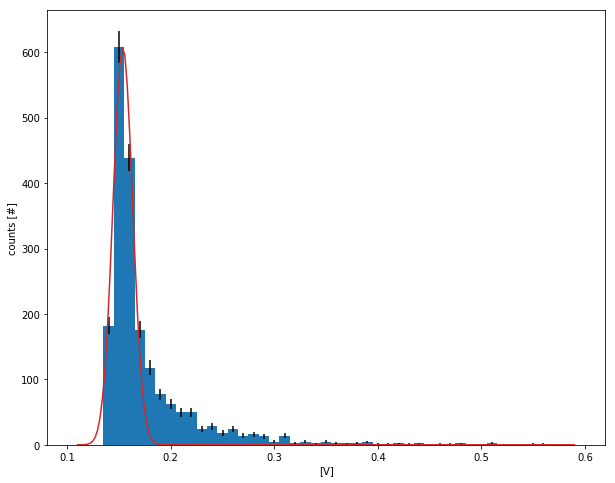

In [75]:
bins = np.arange(0.1, 0.6, 1e-2)

tmp = [-1*p for p in peaks1100_123]
hist, edges = np.histogram(tmp, bins = bins)
center = np.diff(edges)[0]+edges[:-1]
popt, pcov = curve_fit(gaussian, center, hist)

x = np.linspace(min(center),max(center),201)

fig, ax = plt.subplots(figsize = (10,8))
ax.bar(center, hist, yerr = np.round(np.sqrt(hist)), width = np.diff(edges)[0])
ax.plot(x, gaussian(x, *popt), 'C3')
ax.set_ylabel('counts [#]')
ax.set_xlabel('[V]')

print('mean : {0:.2e} V'.format(np.mean(tmp)))
print('gaussian mean: {0:.2e} V'.format(popt[1]))

In [76]:
import pint

ureg = pint.UnitRegistry()

peak = popt[1] * ureg.volt
elementary_charge = 1.6021766*1e-19 * ureg.coulomb
pmt_pulse = 9e-9 * ureg.second
load = 50 * ureg.ohm
amplifier_gain = 125


pmt_gain = (peak / ((elementary_charge/pmt_pulse)*load*amplifier_gain)).to_root_units()
print('PMT gain : {0:.2e}'.format(pmt_gain))

PMT gain : 1.38e+06 dimensionless


### Peak Hamamatsu R375@1400V, SR445A@50Ohm, stages 1,2&3

mean : 3.60e-01 V
gaussian mean: 3.53e-01 V


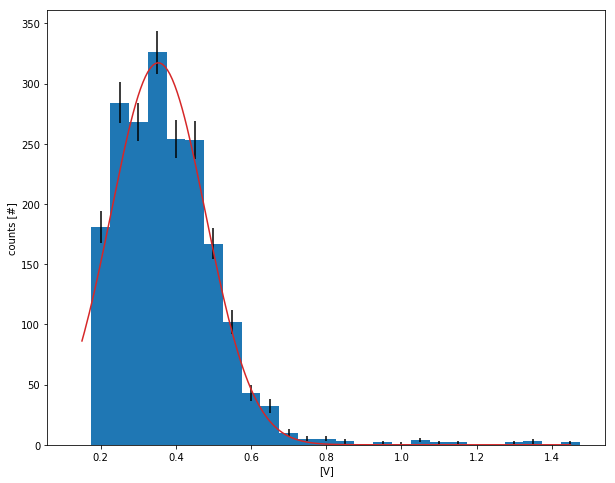

In [77]:
bins = np.arange(0.1, 1.5, 5e-2)

tmp = [-1*p for p in peaks1400_123]
hist, edges = np.histogram(tmp, bins = bins)
center = np.diff(edges)[0]+edges[:-1]
popt, pcov = curve_fit(gaussian, center, hist)

x = np.linspace(min(center),max(center),201)

fig, ax = plt.subplots(figsize = (10,8))
ax.bar(center, hist, yerr = np.round(np.sqrt(hist)), width = np.diff(edges)[0])
ax.plot(x, gaussian(x, *popt), 'C3')
ax.set_ylabel('counts [#]')
ax.set_xlabel('[V]')

print('mean : {0:.2e} V'.format(np.mean(tmp)))
print('gaussian mean: {0:.2e} V'.format(popt[1]))

In [78]:
import pint

ureg = pint.UnitRegistry()

peak = popt[1] * ureg.volt
elementary_charge = 1.6021766*1e-19 * ureg.coulomb
pmt_pulse = 9e-9 * ureg.second
load = 50 * ureg.ohm
amplifier_gain = 125


pmt_gain = (peak / ((elementary_charge/pmt_pulse)*load*amplifier_gain)).to_root_units()
print('PMT gain : {0:.2e}'.format(pmt_gain))

PMT gain : 3.17e+06 dimensionless


### 5 MHz Low Pass Filter

mean : 7.81e-02 V
gaussian mean: 6.66e-02 V


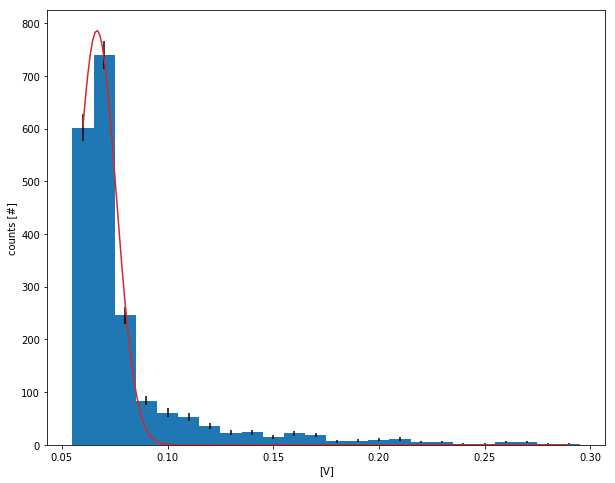

In [171]:
bins = np.arange(0.05, 0.3, 1e-2)

tmp = [-1*d[2] for d in data1400_123_5MhzLP]
hist, edges = np.histogram(tmp, bins = bins)
center = np.diff(edges)[0]+edges[:-1]
popt, pcov = curve_fit(gaussian, center, hist, p0 = (1300,0.075,0.1))

x = np.linspace(min(center),max(center),201)

fig, ax = plt.subplots(figsize = (10,8))
ax.bar(center, hist, yerr = np.round(np.sqrt(hist)), width = np.diff(edges)[0])
ax.plot(x, gaussian(x, *popt), 'C3')
ax.set_ylabel('counts [#]')
ax.set_xlabel('[V]')

print('mean : {0:.2e} V'.format(np.mean(tmp)))
print('gaussian mean: {0:.2e} V'.format(popt[1]))

In [172]:
import pint

ureg = pint.UnitRegistry()

peak = popt[1] * ureg.volt
elementary_charge = 1.6021766*1e-19 * ureg.coulomb
pmt_pulse = 92.1e-9 * ureg.second
load = 50 * ureg.ohm
amplifier_gain = 125


pmt_gain = (peak / ((elementary_charge/pmt_pulse)*load*amplifier_gain)).to_root_units()
print('PMT gain : {0:.2e}'.format(pmt_gain))

PMT gain : 6.12e+06 dimensionless
